In [13]:
from correlated_gaussians import Simulation
from scipy.stats import norm
import math

We conduct here some simulations for the problem. We want to show how we can obtain two standard random variables $X \sim \mathcal{N}(0,1)$,$Y \sim \mathcal{N}(0,1)$  from a uniform sampler $U \sim \mathcal{U}(0,1)$. Furthermore, we want $X$ and $Y$ to have a correlation coefficient $ρ_{xy}$ of $ρ$.

Let us start by simulating what happens when we enforce $ρ = 0.8$. we also fix the number of samples (N) we retrive for $X$ and $Y$.

In [3]:
rho = 0.8
N = 10000

sim = Simulation(rho, N)


We start from two independent uniform random variables $U_1 \sim \mathcal{U}(0,1)$ and $U_2 \sim \mathcal{U}(0,1)$.
We retrieve samples for X and Y with the tranformations:

$X = \Phi_Z^{-1}(U_1) $

$Y = \rho \cdot \Phi_Z^{-1}(U_1) + \sqrt{1-\rho^2} \cdot \Phi_Z^{-1}(U_2)$


In [4]:
obs_x,obs_y = sim.get_observations()

Let's first check that $X$ and $Y$ samples resemble gaussian distributions.

# Plots

Here we plot the estimated distribution for X.

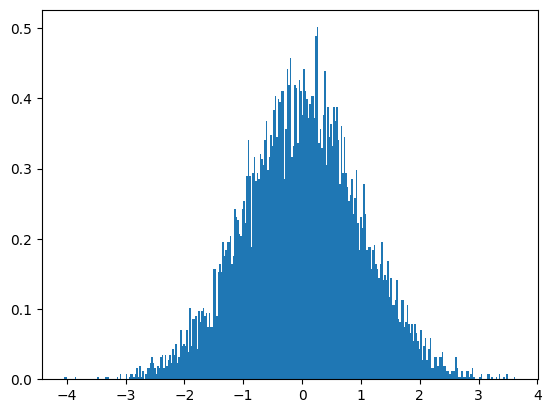

In [6]:
sim.plot_distribition(obs_x)

Here we plot the estimated distribution for Y.

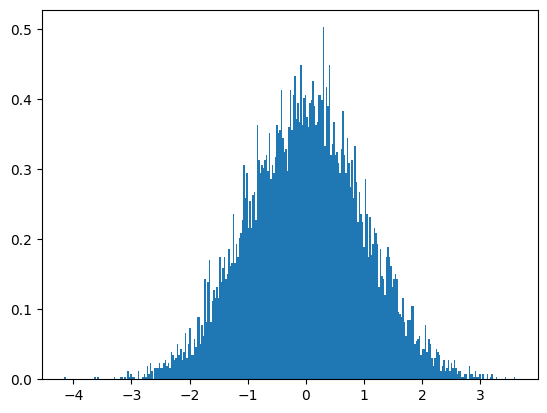

In [7]:
sim.plot_distribition(obs_y)

Both distributions indeed resemble a standard gaussian. Some inconsistencies due to the discretization granularity of the plt.hist function might create some artifacts in the plots.

# Hypothesis Testing

We now carry out some simple hypothesis testing to confirm that the distributions are standard normal.

## Hypothesis testing for the mean of X and Y

Hypothesis testing for the mean $μ$

We can carry out a Z-test to check the means of the two populations. We set:

$H_0:μ = 0$

vs


$H_1: μ \neq 0$


The test-statistic is: $\frac{X̄}{\frac{S^2}{\sqrt{n}}} \sim \mathcal{N}(0,1)$, with X̄ sample mean and $S^2$ sample variance.

We will conduct a test with significance level α = 0.05.

In [15]:
alpha = 0.05
critical_value = norm.ppf(1-alpha/2)

Let's start by carrying out the test on X.

In [16]:
sample_mean_x = sum(obs_x) / len(obs_x)
sample_variance_x = sim.compute_sample_variance(obs_x)

test_statistic = sample_mean_x / (sample_variance_x / math.sqrt(len(obs_x)))

if(-critical_value <= test_statistic <= critical_value):

  print("Null Hypothesis cannot be rejected")

else:

   print("Null Hypothesis has to be rejected")

Null Hypothesis cannot be rejected


Now, let's carry out the test for Y

In [17]:
sample_mean_y = sum(obs_y) / len(obs_y)
sample_variance_y = sim.compute_sample_variance(obs_y)

test_statistic = sample_mean_y / (sample_variance_y / math.sqrt(len(obs_y)))

if(-critical_value <= test_statistic <= critical_value):

  print("Null Hypothesis cannot be rejected")

else:

   print("Null Hypothesis has to be rejected")

Null Hypothesis cannot be rejected


For both X and Y, Null hypothesis cannot be refused. So we confirm that both X and Y are 0 mean gaussians.

## Hypothesis testing for the variance of X and Y

Hypothesis testing for the variance $\sigma^2$

We can carry out a $χ^2$-test to check the variances of the two populations. We set:

$H_0:\sigma^2 = 1$

vs


$H_1: \sigma^2 \neq 1$


The test-statistic is: $\frac{S^2 - 1}{\frac{1}{\sqrt{2n}}} \sim \mathcal{N}(0,1)$, with X̄ sample mean and S sample variance. This test-statistic is built by considering the normal approximation of a $χ^2$ distribution with a large number of degree of freedom.

We will conduct a test with significance level α = 0.05.

In [18]:
alpha = 0.05
critical_value = norm.ppf(1-alpha/2)

Let's start by carrying out the test on X.

In [19]:
sample_variance_x = sim.compute_sample_variance(obs_x)
test_statistic = (sample_variance_x - 1) / (1 / math.sqrt(2 * len(obs_x)))

if(-critical_value <= test_statistic <= critical_value):

  print("Null Hypothesis cannot be rejected")

else:

   print("Null Hypothesis has to be rejected")

Null Hypothesis cannot be rejected


Now, let's carry out the test for Y

In [20]:
sample_variance_y = sim.compute_sample_variance(obs_y)
test_statistic = (sample_variance_y - 1) / (1 / math.sqrt(2 * len(obs_y)))

if(-critical_value <= test_statistic <= critical_value):

  print("Null Hypothesis cannot be rejected")

else:

   print("Null Hypothesis has to be rejected")

Null Hypothesis cannot be rejected


We confirm that the variance of $X$ and $Y$ are standard normal $\mathcal{N}(0,1)$

# Correlation coefficient

Now we compute the Pearson correlation coefficient among our observations. We expect it to be close to $\rho = 0.8$

Here, we manually compute the Pearson coefficient:

In [21]:
sim.get_pearson(obs_x,obs_y)

Pearson coefficient on the samples:  0.7975875076606382


Let's compute the Pearson with scipy library:

In [22]:
from scipy.stats import pearsonr
pearsonr(obs_x,obs_y)

We do get the same result for a value very close to ρ = 0.8